In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


In [0]:
from tensorflow.keras.layers import Dense, Input, LSTM, Flatten, SimpleRNN, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
series = np.sin((0.1*np.arange(400))**2)


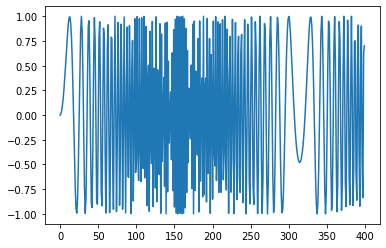

In [4]:
plt.plot(series)
plt.show()

In [5]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape:",Y.shape)

X.shape: (390, 10) Y.shape: (390,)


In [6]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
             loss = 'mse')
r = model.fit(X[:-N//2], Y[:-N//2],
              validation_data=(X[-N//2:], Y[-N//2:]),
              epochs = 80)

Epoch 1/80
7/7 [==============================] - 0s 20ms/step - loss: 1.2780 - val_loss: 1.3032
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 1.0362 - val_loss: 1.1716
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8891 - val_loss: 1.0749
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7620 - val_loss: 0.9863
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8702 - val_loss: 0.9091
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7398 - val_loss: 0.8213
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5651 - val_loss: 0.7584
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5821 - val_loss: 0.7095
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5667 - val_loss: 0.6656
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5547 - val_loss: 0.6403
Epoch 11/80
7/7 [=====================

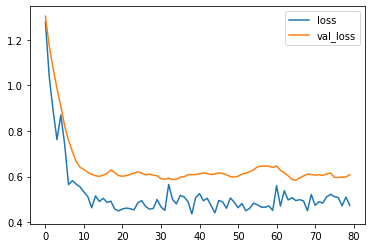

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


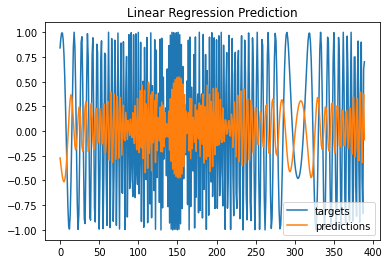

In [8]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

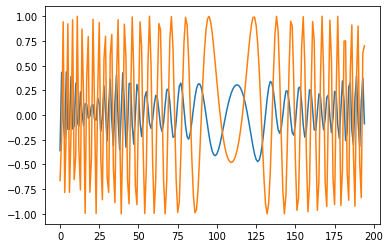

In [9]:
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction) < len(validation_target):
  p =  model.predict(X[i].reshape(1, -1))[0, 0]
  i+=1
  validation_prediction.append(p)
plt.plot(validation_prediction, label="prediction")
plt.plot(validation_target, label='targer')
plt.show()

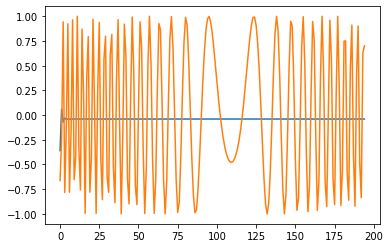

In [10]:
validation_target = Y[-N//2:]
validation_prediction = []
x_last = X[-N//2]
while len(validation_prediction) < len(validation_target):
  p = model.predict(x_last.reshape(1, -1))[0, 0]
  validation_prediction.append(p)
  np.roll(x_last, -1)
  x_last[-1] = p
plt.plot(validation_prediction, label="prediction")
plt.plot(validation_target, label='targer')
plt.show()

In [11]:
X =X.reshape(-1, T, 1)
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data=(X[-N//2:], Y[-N//2:]),
    epochs = 200,
    batch_size=32)

Epoch 1/200
7/7 [==============================] - 0s 46ms/step - loss: 0.5206 - val_loss: 0.5303
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4876 - val_loss: 0.5587
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4389 - val_loss: 0.5585
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4830 - val_loss: 0.5617
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4066 - val_loss: 0.4510
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2786 - val_loss: 0.5381
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2645 - val_loss: 0.2639
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1508 - val_loss: 0.1702
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0902 - val_loss: 0.0993
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0472 - val_loss: 0.1004
Epoch 11/200
7/7 [==========

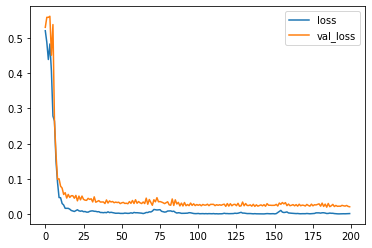

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


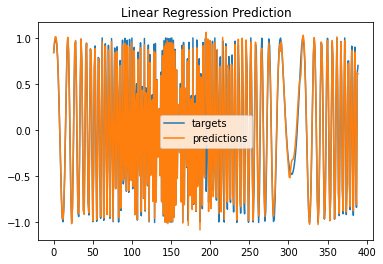

In [13]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

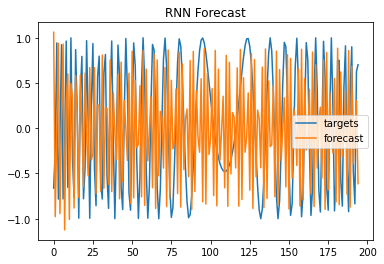

In [14]:
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()